# House Price Investigation (Part 1)

### Setup and quick exploration
Importing Libraries, data and having a quick look for anomalies in data

In [17]:
#import libraries
import functions as func
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [18]:
#read data
df = pd.read_csv("houseprices.csv")
df.head()

,Id,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,MoSold,YrSold,SalePrice
0,1,8450,Pave,Reg,Lvl,AllPub,CollgCr,1Fam,2Story,7,...,3,1,Gd,8,0,Attchd,548,2,2008,208500
1,2,9600,Pave,Reg,Lvl,AllPub,Veenker,1Fam,1Story,6,...,3,1,TA,6,1,Attchd,460,5,2007,181500
2,3,11250,Pave,IR1,Lvl,AllPub,CollgCr,1Fam,2Story,7,...,3,1,Gd,6,1,Attchd,608,9,2008,223500
3,4,9550,Pave,IR1,Lvl,AllPub,Crawfor,1Fam,2Story,7,...,3,1,Gd,7,1,Detchd,642,2,2006,140000
4,5,14260,Pave,IR1,Lvl,AllPub,NoRidge,1Fam,2Story,8,...,4,1,Gd,9,1,Attchd,836,12,2008,250000


In [19]:
#check high sale prices
oddsales = df[(df['SalePrice'] >= 500000)]
oddsales

,Id,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,MoSold,YrSold,SalePrice
178,179,17423,Pave,IR1,Lvl,AllPub,StoneBr,1Fam,1Story,9,...,1,1,Ex,9,1,Attchd,1166,7,2009,501837
440,441,15431,Pave,Reg,Lvl,AllPub,NridgHt,1Fam,1Story,10,...,2,1,Ex,10,2,Attchd,672,4,2009,555000
691,692,21535,Pave,IR1,Lvl,AllPub,NoRidge,1Fam,2Story,10,...,4,1,Ex,10,2,Attchd,832,1,2007,755000
769,770,53504,Pave,IR2,HLS,AllPub,StoneBr,1Fam,2Story,8,...,4,1,Ex,12,1,BuiltIn,841,6,2010,538000
803,804,13891,Pave,Reg,Lvl,AllPub,NridgHt,1Fam,2Story,9,...,4,1,Ex,12,1,BuiltIn,1020,1,2009,582933
898,899,12919,Pave,IR1,Lvl,AllPub,NridgHt,1Fam,1Story,9,...,2,1,Ex,11,2,Attchd,820,3,2010,611657
1046,1047,16056,Pave,IR1,Lvl,AllPub,StoneBr,1Fam,2Story,9,...,4,1,Ex,11,1,BuiltIn,716,7,2006,556581
1169,1170,35760,Pave,IR1,Lvl,AllPub,NoRidge,1Fam,2Story,10,...,4,1,Gd,10,1,Attchd,807,7,2006,625000
1182,1183,15623,Pave,IR1,Lvl,AllPub,NoRidge,1Fam,2Story,10,...,4,1,Ex,10,2,Attchd,813,7,2007,745000


In [20]:
#look at average lot area
df["LotArea"].mean()

10516.828082191782

Text(0.5, 1.0, 'Sales Price Distribution')

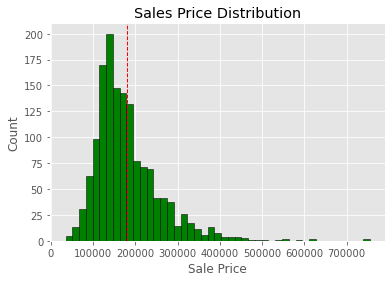

In [21]:
#sales prices histogram
plt.hist(df['SalePrice'], color='g', edgecolor='black', bins=int(45/1))
plt.axvline(np.mean(df.SalePrice), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Sales Price Distribution')

### Logistic Regression

We now fit the logistic regression model and score the outputs.

In [22]:
#make tidy version of dataframe for model to work with
model_df = df.copy(deep=True)
model_df = func.tidyData(model_df)

In [23]:
#log score of model
log_scores = func.fitLogisticRegression(model_df, func.logScore)
print(np.mean(log_scores), np.std(log_scores))

29.630225405760505 10.17852537144227


In [24]:
#brier score of model
brier_scores = func.fitLogisticRegression(model_df, func.brierScore)
print(np.mean(brier_scores), np.std(brier_scores))

0.06038922486254315 0.015604344284648176


In [25]:
#accuracy score of model
acc_scores = func.fitLogisticRegression(model_df, func.accuracyScore)
print(np.mean(acc_scores), np.std(acc_scores))

0.9216121866074263 0.021269063760931576


### Investigating good predictors

Investigating some of our predictors to decide what to use for Naive Bayes.

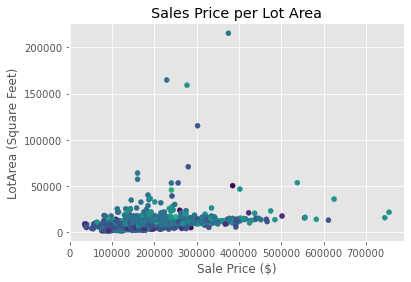

In [26]:
#Lot area does not show much impact on sale price apart from a few outliers
plt.figure(figsize=(6,4))
plt.scatter(df.SalePrice, df.LotArea, c = df.BedroomAbvGr, marker = ".", s=100)
plt.title("Sales Price per Lot Area")
plt.ylabel("LotArea (Square Feet)")
plt.xlabel("Sale Price ($)")
plt.show()

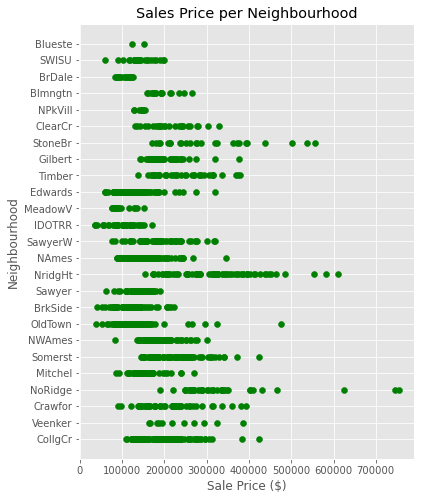

In [27]:
#Neighbourhood good predictor, shows each house in each neighbourhood are similar
plt.figure().set_figheight(8)
plt.scatter(df.SalePrice, df.Neighborhood, color = 'g') 
plt.title("Sales Price per Neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Sale Price ($)")
plt.show()

[Text(0.5, 0, 'Building Type'),
 Text(0, 0.5, 'Sales Price'),
 Text(0.5, 1.0, 'Sales Price per Type of Building')]

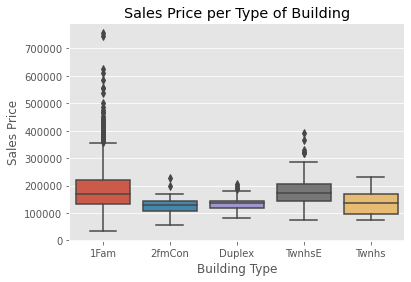

In [28]:
# Building type good predictor, shows variation by house type
sns.boxplot(x= "BldgType", y = "SalePrice", data = df).set(xlabel ="Building Type", ylabel = "Sales Price", title = "Sales Price per Type of Building")

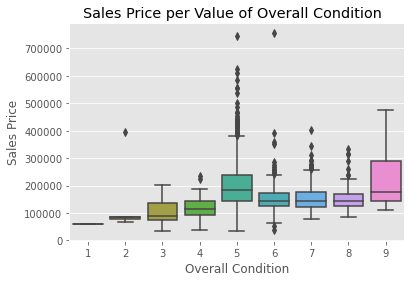

In [29]:
#Sales Price also appears to vary with overall condition rating
sns.boxplot(x= "OverallCond", y = "SalePrice", data = df).set(xlabel ="Overall Condition", ylabel = "Sales Price", title = "Sales Price per Value of Overall Condition  ")
plt.show() 

### Fitting Naive Bayes

We now fit a Naive Bayes model to our chosen predictors and score the outcome

In [30]:
#log score of model (reusing tidied dataframe)
log_scores = func.fitNaiveBayes(model_df, func.logScore)
print(np.mean(log_scores), np.std(log_scores))

59.55938894146889 7.7790074076926174


In [31]:
#brier score of model
brier_scores = func.fitNaiveBayes(model_df, func.brierScore)
print(np.mean(brier_scores), np.std(brier_scores))

0.13363597734082344 0.018122451564873666


In [32]:
#accuracy score of model
acc_scores = func.fitNaiveBayes(model_df, func.accuracyScore)
print(np.mean(acc_scores), np.std(acc_scores))

0.8098169893155612 0.029726946523239504
